In [1]:
import subprocess
from io import BytesIO
from pathlib import Path
from zipfile import ZipFile

import us
import requests
import geopandas as gd
import pandas as pd
import numpy as np

In [2]:
BASE_DIR = Path().cwd().parent
DATA_DIR = BASE_DIR.joinpath("data")
INPUT_DIR = DATA_DIR.joinpath("raw")
OUTPUT_DIR = DATA_DIR.joinpath("processed")
LOCAL_SHP_DIR = BASE_DIR.joinpath("shp")

## Extract

In [3]:
# Crosswalk Between 2010 and 2020 US Census Tracts 
# CENSUS_CROSSWALK_URL = "https://opportunityinsights.org/wp-content/uploads/2021/05/us_tract_2010_2020_crosswalk.csv"

In [4]:
# Neighborhood Characteristics by Census Tract 
NEIGHBORHOOD_DATA_URL = "https://opportunityinsights.org/wp-content/uploads/2018/10/tract_covariates.csv"

# All Outcomes by Census Tract, Race, Gender and Parental Income Percentile 
OUTCOMES_DATA_URL = "https://opportunityinsights.org/wp-content/uploads/2018/10/tract_outcomes.zip"

Source: https://opportunityinsights.org/data/?geographic_level=99&topic=0&paper_id=0#resource-listing

In [5]:
for directory in [DATA_DIR, INPUT_DIR, OUTPUT_DIR]:
    Path.mkdir(directory, exist_ok=True)

In [6]:
neighborhood_csv = INPUT_DIR.joinpath("tract_covariates.csv")
outcomes_csv = INPUT_DIR.joinpath("tract_outcomes_early.csv")

In [7]:
%%time
if not neighborhood_csv.exists():
    print("fetching neighborhood data...")
    csv_res = requests.get(NEIGHBORHOOD_DATA_URL)
    if csv_res.ok:
        print(f"  saving to {neighborhood_csv}...")
        with open(neighborhood_csv, "w") as f:
            f.write(csv_res.text)

CPU times: user 86 µs, sys: 57 µs, total: 143 µs
Wall time: 138 µs


In [8]:
pd.read_csv(neighborhood_csv, nrows=5)

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,1,1,20100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109,3396,504.75183,-0.006769,92.133049
1,1,1,20200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948,3328,1682.17050,-0.004253,971.317870
2,1,1,20300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387,3230,1633.41390,0.014218,340.920070
3,1,1,20400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933,3635,1780.03250,-0.019841,207.386370
4,1,1,20500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933,3635,2446.26220,0.018627,800.272640


In [9]:
%%time
if not outcomes_csv.exists():
    print("fetching outcomes data... (warning: large dataset!)")
    zip_res = requests.get(OUTCOMES_DATA_URL)
    if zip_res.ok:
        print(f"  saving to {outcomes_csv}...")
        outcome_zip = ZipFile(BytesIO(zip_res.content))
        outcome_zip.extractall(INPUT_DIR)

CPU times: user 34 µs, sys: 42 µs, total: 76 µs
Wall time: 51.3 µs


In [10]:
pd.read_csv(outcomes_csv, nrows=5)

,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,kir_natam_female_n,kir_natam_female_mean,...,jail_white_pooled_mean_se,kfr_white_pooled_mean_se,staytract_white_pooled_mean_se,staycz_white_pooled_mean_se,stayhome_white_pooled_mean_se,working_white_pooled_mean_se,kir_stycz_white_pooled_mean_se,kfr_stycz_white_pooled_mean_se,spouse_rk_white_pooled_mean_se,par_rank_white_pooled_mean_se
0,1,1,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007490,0.014829,0.020353,0.025752,0.019710,0.025348,0.018290,0.017890,0.018882,0.013778
1,1,1,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003828,0.020797,0.028821,0.041338,0.028252,0.029613,0.030380,0.028010,0.025328,0.021874
2,1,1,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002141,0.011726,0.016670,0.022392,0.015206,0.019161,0.015177,0.015285,0.016145,0.009353
3,1,1,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001777,0.010787,0.016027,0.019096,0.012477,0.016844,0.014253,0.014508,0.014396,0.009628
4,1,1,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000983,0.008789,0.012861,0.017491,0.010930,0.014396,0.011836,0.012748,0.010329,0.006667


## Transform

In [11]:
%%time
geo_df = gd.read_file(LOCAL_SHP_DIR.joinpath("nhgis0001_shapefile_tl2010_us_tract_2010.zip"))
geo_df.head()

CPU times: user 8.38 s, sys: 327 ms, total: 8.71 s
Wall time: 8.86 s


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,G0600830002402,1.633304e+07,19109.934868,"POLYGON ((-2190454.484 -1818.340, -2190458.553..."
1,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,+34.9421111,-120.4267767,G0600830002102,1.352547e+06,4958.900746,"POLYGON ((-2187515.087 -3474.486, -2187572.399..."
2,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,+34.8722878,-120.4277159,G0600830002009,2.603279e+06,6578.282432,"POLYGON ((-2189494.128 -10631.359, -2189516.12..."
3,06,083,002008,06083002008,20.08,Census Tract 20.08,G5020,S,3295314,0,+34.8861824,-120.4250770,G0600830002008,3.295312e+06,8848.654446,"POLYGON ((-2189029.408 -9557.208, -2189024.501..."
4,06,011,000500,06011000500,5,Census Tract 5,G5020,S,170218418,4285285,+39.3147440,-121.9636465,G0600110000500,1.745037e+08,78247.144082,"POLYGON ((-2192298.375 513039.620, -2192185.26..."


In [12]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73669 entries, 0 to 73668
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   73669 non-null  object  
 1   COUNTYFP10  73669 non-null  object  
 2   TRACTCE10   73669 non-null  object  
 3   GEOID10     73669 non-null  object  
 4   NAME10      73669 non-null  object  
 5   NAMELSAD10  73669 non-null  object  
 6   MTFCC10     73669 non-null  object  
 7   FUNCSTAT10  73669 non-null  object  
 8   ALAND10     73669 non-null  int64   
 9   AWATER10    73669 non-null  int64   
 10  INTPTLAT10  73669 non-null  object  
 11  INTPTLON10  73669 non-null  object  
 12  GISJOIN     73669 non-null  object  
 13  Shape_area  73669 non-null  float64 
 14  Shape_len   73669 non-null  float64 
 15  geometry    73669 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 9.0+ MB


In [13]:
len(geo_df)

73669

Match `GEOID10` column of `geo_df` with subsequent data

[Neighborhood Characteristics codebook](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-9.pdf)

In [14]:
RACE_FIELDS = [
    "white", 
    "black", 
    "hisp", 
    "asian", 
]

YEARS = [
    # "1990",
    "2000",
    "2010",
]

In [15]:
NEIGHBORHOOD_COLUMNS = [
    "state",
    "county",
    "tract",
    # Average annualized job growth rate over the time period 2004 to 2013
    "ann_avg_job_growth_2004_2013",
    # fraction of pop w/ bachelor's degree or higher
    "frac_coll_plus2000",
    "frac_coll_plus2010",
    # share of single parent households
    "singleparent_share1990",
    "singleparent_share2000",
    "singleparent_share2010",
    # poverty
    "poor_share1990",
    "poor_share2000",
    "poor_share2010",
    # high-paying jobs within 5 mi
    "jobs_highpay_5mi_2015",
    # median household income
    "med_hhinc1990",
] + sorted(np.array(
    [[f"share_{r}{y}" for r in RACE_FIELDS] for y in YEARS]
).flatten().tolist())

NEIGHBORHOOD_COLUMNS

['state',
 'county',
 'tract',
 'ann_avg_job_growth_2004_2013',
 'frac_coll_plus2000',
 'frac_coll_plus2010',
 'singleparent_share1990',
 'singleparent_share2000',
 'singleparent_share2010',
 'poor_share1990',
 'poor_share2000',
 'poor_share2010',
 'jobs_highpay_5mi_2015',
 'med_hhinc1990',
 'share_asian2000',
 'share_asian2010',
 'share_black2000',
 'share_black2010',
 'share_hisp2000',
 'share_hisp2010',
 'share_white2000',
 'share_white2010']

In [16]:
%%time
neighborhood_df = pd.read_csv(
    neighborhood_csv, 
    dtype={"state": str, "county": str, "tract": str, "cz": str},
    usecols=NEIGHBORHOOD_COLUMNS
)
neighborhood_df.head()

CPU times: user 122 ms, sys: 12.9 ms, total: 135 ms
Wall time: 144 ms


,state,county,tract,frac_coll_plus2000,frac_coll_plus2010,med_hhinc1990,poor_share2010,poor_share2000,poor_share1990,share_white2010,...,share_asian2010,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013
0,1,1,20100,0.156479,0.254428,27375.0,0.105030,0.126816,0.098872,0.837343,...,0.004707,0.075482,0.896929,0.006247,0.003644,0.113924,0.181185,0.250980,3396.0,-0.006769
1,1,1,20200,0.146932,0.267194,19000.0,0.147590,0.227058,0.198339,0.388940,...,0.002304,0.622093,0.354651,0.008457,0.003171,0.488462,0.352459,0.392523,3328.0,-0.004253
2,1,1,20300,0.224413,0.164159,29419.0,0.080385,0.076640,0.113981,0.752446,...,0.004744,0.149146,0.820006,0.016472,0.003893,0.228070,0.125908,0.244856,3230.0,0.014218
3,1,1,20400,0.230469,0.252744,37891.0,0.063223,0.045485,0.067897,0.918833,...,0.003648,0.025900,0.937884,0.022169,0.007288,0.227533,0.126761,0.190722,3635.0,-0.019841
4,1,1,20500,0.321154,0.375063,41516.0,0.059569,0.036792,0.054734,0.783764,...,0.026032,0.060099,0.897020,0.015728,0.010596,0.259698,0.074364,0.168000,3635.0,0.018627


In [17]:
neighborhood_df.query("tract == '900'").state.count()

234

In [18]:
neighborhood_df["state"] = neighborhood_df["state"].apply(lambda x: "0" + x if len(x) < 2 else x)
neighborhood_df["county"] = neighborhood_df["county"].apply(lambda x: "00" + x if len(x) == 1 else "0" + x if len(x) == 2 else x)
neighborhood_df["tract"] = neighborhood_df["tract"].apply(lambda x: "000" + x if len(x) == 3 else "00" + x if len(x) == 4 else "0" + x if len(x) == 5 else x)
neighborhood_df["GEOID10"] = neighborhood_df["state"] + neighborhood_df["county"] + neighborhood_df["tract"]
neighborhood_df.head()

,state,county,tract,frac_coll_plus2000,frac_coll_plus2010,med_hhinc1990,poor_share2010,poor_share2000,poor_share1990,share_white2010,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,GEOID10
0,01,001,020100,0.156479,0.254428,27375.0,0.105030,0.126816,0.098872,0.837343,...,0.075482,0.896929,0.006247,0.003644,0.113924,0.181185,0.250980,3396.0,-0.006769,01001020100
1,01,001,020200,0.146932,0.267194,19000.0,0.147590,0.227058,0.198339,0.388940,...,0.622093,0.354651,0.008457,0.003171,0.488462,0.352459,0.392523,3328.0,-0.004253,01001020200
2,01,001,020300,0.224413,0.164159,29419.0,0.080385,0.076640,0.113981,0.752446,...,0.149146,0.820006,0.016472,0.003893,0.228070,0.125908,0.244856,3230.0,0.014218,01001020300
3,01,001,020400,0.230469,0.252744,37891.0,0.063223,0.045485,0.067897,0.918833,...,0.025900,0.937884,0.022169,0.007288,0.227533,0.126761,0.190722,3635.0,-0.019841,01001020400
4,01,001,020500,0.321154,0.375063,41516.0,0.059569,0.036792,0.054734,0.783764,...,0.060099,0.897020,0.015728,0.010596,0.259698,0.074364,0.168000,3635.0,0.018627,01001020500


In [19]:
neighborhood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74044 entries, 0 to 74043
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         74044 non-null  object 
 1   county                        74044 non-null  object 
 2   tract                         74044 non-null  object 
 3   frac_coll_plus2000            72464 non-null  float64
 4   frac_coll_plus2010            73248 non-null  float64
 5   med_hhinc1990                 72420 non-null  float64
 6   poor_share2010                73137 non-null  float64
 7   poor_share2000                72416 non-null  float64
 8   poor_share1990                72436 non-null  float64
 9   share_white2010               73426 non-null  float64
 10  share_black2010               73426 non-null  float64
 11  share_hisp2010                73426 non-null  float64
 12  share_asian2010               72188 non-null  float64
 13  s

Check the length of the data for validation

In [20]:
len(neighborhood_df)

74044

Now that we have the data we need, we'll select a single outcome for testing/dev and export the final dataset.

[Opportunity Atlas](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-4.pdf) uses a nested structure to create columns like the following:

```
[outcome]_[race]_[gender]_p[pctile]
```

So, we'll pre-compute these columns for a single measure and then export the data as geojson

In [21]:
race =  RACE_FIELDS + [
    "pooled",
#     "natam", 
#     "other",
]
gender = [
    "pooled",
#     "male", 
#     "female",
]
pctile = [
#     "1", 
    "25", 
    "50", 
    "75", 
#     "100",
]
outcome = [
#     "kfr",
#     "kfr_top01",
#     "kfr_top20",
    "kir",
    "kir_top01",
    "kir_top20",
]

In [22]:
base_cols = [ "state", "county", "tract"]
join_cols = ["GEOID10"]
geo_cols = ["geometry"]

In [23]:
mean_predicted_income_cols =  np.array(
    [[[[f"{o}_{r}_{g}_p{p}" for o in outcome] for p in pctile] for r in race] for g in gender]
).flatten().tolist()

mean_predicted_income_cols

['kir_white_pooled_p25',
 'kir_top01_white_pooled_p25',
 'kir_top20_white_pooled_p25',
 'kir_white_pooled_p50',
 'kir_top01_white_pooled_p50',
 'kir_top20_white_pooled_p50',
 'kir_white_pooled_p75',
 'kir_top01_white_pooled_p75',
 'kir_top20_white_pooled_p75',
 'kir_black_pooled_p25',
 'kir_top01_black_pooled_p25',
 'kir_top20_black_pooled_p25',
 'kir_black_pooled_p50',
 'kir_top01_black_pooled_p50',
 'kir_top20_black_pooled_p50',
 'kir_black_pooled_p75',
 'kir_top01_black_pooled_p75',
 'kir_top20_black_pooled_p75',
 'kir_hisp_pooled_p25',
 'kir_top01_hisp_pooled_p25',
 'kir_top20_hisp_pooled_p25',
 'kir_hisp_pooled_p50',
 'kir_top01_hisp_pooled_p50',
 'kir_top20_hisp_pooled_p50',
 'kir_hisp_pooled_p75',
 'kir_top01_hisp_pooled_p75',
 'kir_top20_hisp_pooled_p75',
 'kir_asian_pooled_p25',
 'kir_top01_asian_pooled_p25',
 'kir_top20_asian_pooled_p25',
 'kir_asian_pooled_p50',
 'kir_top01_asian_pooled_p50',
 'kir_top20_asian_pooled_p50',
 'kir_asian_pooled_p75',
 'kir_top01_asian_pooled_p7

In [24]:
%%time
outcomes_df = pd.read_csv(
    outcomes_csv, 
    dtype={"state": str, "county": str, "tract": str},
    usecols=base_cols + mean_predicted_income_cols
)
outcomes_df.head()

CPU times: user 8.37 s, sys: 379 ms, total: 8.75 s
Wall time: 9.16 s


,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,kir_top20_asian_pooled_p75,kir_top01_asian_pooled_p25,...,kir_top01_pooled_pooled_p75,kir_white_pooled_p25,kir_white_pooled_p50,kir_white_pooled_p75,kir_top20_white_pooled_p25,kir_top20_white_pooled_p50,kir_top20_white_pooled_p75,kir_top01_white_pooled_p25,kir_top01_white_pooled_p50,kir_top01_white_pooled_p75
0,1,1,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011889,0.355713,0.427837,0.506952,0.089754,0.128669,0.194423,0.008704,0.008808,0.009073
1,1,1,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000468,0.492808,0.537778,0.587108,0.101421,0.172903,0.293685,-0.002880,-0.006790,-0.016765
2,1,1,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.003258,0.434541,0.469666,0.508197,0.115384,0.128477,0.150601,-0.001329,-0.000823,0.000465
3,1,1,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011039,0.397795,0.464378,0.537417,0.070241,0.117490,0.197325,0.002017,0.003933,0.008821
4,1,1,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004822,0.449218,0.495133,0.545500,0.129166,0.166167,0.228686,0.002598,0.003084,0.004323


In [25]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73278 entries, 0 to 73277
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        73278 non-null  object 
 1   county                       73278 non-null  object 
 2   tract                        73278 non-null  object 
 3   kir_asian_pooled_p25         15440 non-null  float64
 4   kir_asian_pooled_p50         15440 non-null  float64
 5   kir_asian_pooled_p75         15440 non-null  float64
 6   kir_top20_asian_pooled_p25   15440 non-null  float64
 7   kir_top20_asian_pooled_p50   15440 non-null  float64
 8   kir_top20_asian_pooled_p75   15440 non-null  float64
 9   kir_top01_asian_pooled_p25   15440 non-null  float64
 10  kir_top01_asian_pooled_p50   15440 non-null  float64
 11  kir_top01_asian_pooled_p75   15440 non-null  float64
 12  kir_black_pooled_p25         34088 non-null  float64
 13  kir_black_pooled

In [26]:
outcomes_df["state"] = outcomes_df["state"].apply(lambda x: "0" + x if len(x) < 2 else x)
outcomes_df["county"] = outcomes_df["county"].apply(lambda x: "00" + x if len(x) == 1 else "0" + x if len(x) == 2 else x)
outcomes_df["tract"] = outcomes_df["tract"].apply(lambda x: "000" + x if len(x) == 3 else "00" + x if len(x) == 4 else "0" + x if len(x) == 5 else x)
outcomes_df["GEOID10"] = outcomes_df["state"] + outcomes_df["county"] + outcomes_df["tract"]
outcomes_df.head()

,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,kir_top20_asian_pooled_p75,kir_top01_asian_pooled_p25,...,kir_white_pooled_p25,kir_white_pooled_p50,kir_white_pooled_p75,kir_top20_white_pooled_p25,kir_top20_white_pooled_p50,kir_top20_white_pooled_p75,kir_top01_white_pooled_p25,kir_top01_white_pooled_p50,kir_top01_white_pooled_p75,GEOID10
0,01,001,020100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.355713,0.427837,0.506952,0.089754,0.128669,0.194423,0.008704,0.008808,0.009073,01001020100
1,01,001,020200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.492808,0.537778,0.587108,0.101421,0.172903,0.293685,-0.002880,-0.006790,-0.016765,01001020200
2,01,001,020300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.434541,0.469666,0.508197,0.115384,0.128477,0.150601,-0.001329,-0.000823,0.000465,01001020300
3,01,001,020400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.397795,0.464378,0.537417,0.070241,0.117490,0.197325,0.002017,0.003933,0.008821,01001020400
4,01,001,020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.449218,0.495133,0.545500,0.129166,0.166167,0.228686,0.002598,0.003084,0.004323,01001020500


Verify data length

In [27]:
len(outcomes_df)

73278

Based on the Opportunity Atlas map, there are ~1,000ish tracts that do not have outcome data likely do to low populations (think rural areas.) We'll drop these out of the data but want to account for this edge case in the interactive.

### Join data

First we'll join the CSV files together. We have more neighborhood tracts than outcome tracts so we should drop anything we don't have in our outcome data. We use a left join to keep all outcome tracts.

In [28]:
%%time
print("Merging all opportunity atlas data...")
nbr_outcome_df = pd.merge(
    outcomes_df,
    neighborhood_df,
    how="left",
    on=["GEOID10", "state", "county", "tract"],
    validate="one_to_one"
)

Merging all opportunity atlas data...
CPU times: user 130 ms, sys: 10.6 ms, total: 141 ms
Wall time: 143 ms


We should probably cut down the total column count here

In [29]:
len(nbr_outcome_df.columns)

68

In [30]:
nbr_outcome_df.head()

,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,kir_top20_asian_pooled_p75,kir_top01_asian_pooled_p25,...,share_asian2010,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013
0,01,001,020100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004707,0.075482,0.896929,0.006247,0.003644,0.113924,0.181185,0.250980,3396.0,-0.006769
1,01,001,020200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002304,0.622093,0.354651,0.008457,0.003171,0.488462,0.352459,0.392523,3328.0,-0.004253
2,01,001,020300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004744,0.149146,0.820006,0.016472,0.003893,0.228070,0.125908,0.244856,3230.0,0.014218
3,01,001,020400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003648,0.025900,0.937884,0.022169,0.007288,0.227533,0.126761,0.190722,3635.0,-0.019841
4,01,001,020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026032,0.060099,0.897020,0.015728,0.010596,0.259698,0.074364,0.168000,3635.0,0.018627


### Add missing state/county info

The default datasets do not contain state name information so we'll add it via the [python-us](https://github.com/unitedstates/python-us) package

In [31]:
nbr_outcome_df["state_name"] = nbr_outcome_df.state.apply(lambda x: us.states.lookup(x).name)

In [32]:
nbr_outcome_df.head()

,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,kir_top20_asian_pooled_p75,kir_top01_asian_pooled_p25,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
0,01,001,020100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.075482,0.896929,0.006247,0.003644,0.113924,0.181185,0.250980,3396.0,-0.006769,Alabama
1,01,001,020200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.622093,0.354651,0.008457,0.003171,0.488462,0.352459,0.392523,3328.0,-0.004253,Alabama
2,01,001,020300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.149146,0.820006,0.016472,0.003893,0.228070,0.125908,0.244856,3230.0,0.014218,Alabama
3,01,001,020400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.025900,0.937884,0.022169,0.007288,0.227533,0.126761,0.190722,3635.0,-0.019841,Alabama
4,01,001,020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.060099,0.897020,0.015728,0.010596,0.259698,0.074364,0.168000,3635.0,0.018627,Alabama


How many items did we join

How many columns don't have pooled high income parent black/white columns?

### Adding geo data

Now, we'll join our geo data to our opportunity insights data

In [33]:
%%time
print("Merging opportunity atlas data with geometry...")
merge_geo_df = geo_df.merge(
    nbr_outcome_df,
    on="GEOID10",
    how="left",
    validate="one_to_one",
)

Merging opportunity atlas data with geometry...
CPU times: user 152 ms, sys: 29.3 ms, total: 181 ms
Wall time: 198 ms


### Explore missing data

How many tracts don't have state columns?

In [34]:
len(nbr_outcome_df) == len(outcomes_df)

True

In [35]:
nbr_outcome_df[nbr_outcome_df["kir_black_pooled_p75"].isna() & nbr_outcome_df["kir_white_pooled_p75"].isna()].tract.count()

2210

In [36]:
missing_state_geo_df = merge_geo_df[merge_geo_df["state"].isna()]

In [37]:
missing_state_geo_df.GEOID10.count()

475

In [38]:
missing_state_geo_df[["STATEFP10"]].groupby("STATEFP10").STATEFP10.count().sort_values(ascending=False)

STATEFP10
72    179
36     43
12     30
06     26
51     17
48     16
26     14
37     13
08     11
42     10
04     10
15      9
13      7
47      7
25      7
45      6
32      6
21      6
22      5
34      4
24      4
55      4
39      3
46      3
01      3
28      3
20      3
17      3
31      2
30      2
27      2
09      2
49      2
18      2
10      1
05      1
53      1
50      1
19      1
33      1
41      1
40      1
02      1
35      1
29      1
Name: STATEFP10, dtype: int64

In [39]:
missing_state_geo_df.GEOID10.str.len().unique()

array([11])

In [40]:
nbr_outcome_df.GEOID10.str.len().unique()

array([11])

In [41]:
nbr_outcome_df[nbr_outcome_df.GEOID10.str.len() == 9]

,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,kir_top20_asian_pooled_p75,kir_top01_asian_pooled_p25,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name


In [42]:
geo_df[geo_df["GEOID10"] == "06083002402"]

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,G0600830002402,1.633304e+07,19109.934868,"POLYGON ((-2190454.484 -1818.340, -2190458.553..."


In [43]:
nbr_outcome_df[nbr_outcome_df["GEOID10"] == "06083002402"]

,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,kir_top20_asian_pooled_p75,kir_top01_asian_pooled_p25,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
10397,06,083,002402,0.433894,0.563682,0.735726,0.07319,0.25002,0.603681,0.019341,...,0.018689,0.233314,0.697123,0.035301,0.347126,0.365546,0.304585,14478.0,-0.004769,California


### Project

NHGIS uses the albersUSA map projection for all data so we'll need to convert it to wgs 84 to work w/ web maps and make it generally easier to interop w/ other geo tools

In [44]:
merge_geo_df.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

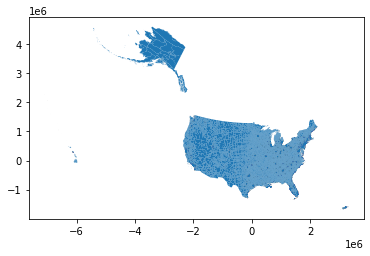

In [45]:
merge_geo_df.plot()

projecting to WGS 84...


<AxesSubplot:>

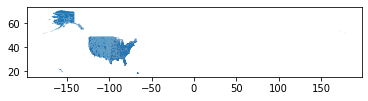

In [46]:
merge_geo_df = merge_geo_df.set_geometry("geometry")
print("projecting to WGS 84...")
projected_geo_df = merge_geo_df.to_crs("EPSG:4326")
projected_geo_df.plot()

In [47]:
projected_geo_df[["GEOID10","geometry"]].head()

,GEOID10,geometry
0,06083002402,"POLYGON ((-120.45362 34.95336, -120.45363 34.9..."
1,06083002102,"POLYGON ((-120.41759 34.94572, -120.41766 34.9..."
2,06083002009,"POLYGON ((-120.41864 34.87936, -120.41865 34.8..."
3,06083002008,"POLYGON ((-120.41669 34.88970, -120.41654 34.8..."
4,06011000500,"POLYGON ((-122.00974 39.38387, -122.00836 39.3..."


In [48]:
projected_geo_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,...,0.018689,0.233314,0.697123,0.035301,0.347126,0.365546,0.304585,14478.0,-0.004769,California
1,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,...,0.027927,0.589907,0.341009,0.020600,0.486842,0.243299,0.269058,14359.0,0.054087,California
2,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,...,0.025110,0.788907,0.131071,0.027321,0.143210,0.096685,0.159041,9923.0,0.145349,California
3,06,083,002008,06083002008,20.08,Census Tract 20.08,G5020,S,3295314,0,...,0.021018,0.737662,0.181224,0.030086,0.389646,0.193277,0.236659,13906.0,-0.069730,California
4,06,011,000500,06011000500,5,Census Tract 5,G5020,S,170218418,4285285,...,0.003020,0.560589,0.394488,0.007928,0.401163,0.363128,0.313889,578.0,0.011729,California


## Load

In [49]:
output_geo_df = projected_geo_df.drop(geo_df.drop(["geometry", "GEOID10"], axis=1).columns.tolist(), axis=1)

In [50]:
output_geo_df.head()

,GEOID10,geometry,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
0,06083002402,"POLYGON ((-120.45362 34.95336, -120.45363 34.9...",06,083,002402,0.433894,0.563682,0.735726,0.073190,0.250020,...,0.018689,0.233314,0.697123,0.035301,0.347126,0.365546,0.304585,14478.0,-0.004769,California
1,06083002102,"POLYGON ((-120.41759 34.94572, -120.41766 34.9...",06,083,002102,NaN,NaN,NaN,NaN,NaN,...,0.027927,0.589907,0.341009,0.020600,0.486842,0.243299,0.269058,14359.0,0.054087,California
2,06083002009,"POLYGON ((-120.41864 34.87936, -120.41865 34.8...",06,083,002009,NaN,NaN,NaN,NaN,NaN,...,0.025110,0.788907,0.131071,0.027321,0.143210,0.096685,0.159041,9923.0,0.145349,California
3,06083002008,"POLYGON ((-120.41669 34.88970, -120.41654 34.8...",06,083,002008,0.707464,0.677261,0.637226,0.340184,0.395281,...,0.021018,0.737662,0.181224,0.030086,0.389646,0.193277,0.236659,13906.0,-0.069730,California
4,06011000500,"POLYGON ((-122.00974 39.38387, -122.00836 39.3...",06,011,000500,NaN,NaN,NaN,NaN,NaN,...,0.003020,0.560589,0.394488,0.007928,0.401163,0.363128,0.313889,578.0,0.011729,California


Export to geojson

In [51]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'TopoJSON': 'r'}

In [52]:
# output_geojson = INPUT_DIR.joinpath("dev-tracts-geo.json")
# print("Exporting geojson...")
# output_geo_df.to_file(output_geojson, driver="GeoJSON")

## generate california only data

In [53]:
output_geo_df.head()

,GEOID10,geometry,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
0,06083002402,"POLYGON ((-120.45362 34.95336, -120.45363 34.9...",06,083,002402,0.433894,0.563682,0.735726,0.073190,0.250020,...,0.018689,0.233314,0.697123,0.035301,0.347126,0.365546,0.304585,14478.0,-0.004769,California
1,06083002102,"POLYGON ((-120.41759 34.94572, -120.41766 34.9...",06,083,002102,NaN,NaN,NaN,NaN,NaN,...,0.027927,0.589907,0.341009,0.020600,0.486842,0.243299,0.269058,14359.0,0.054087,California
2,06083002009,"POLYGON ((-120.41864 34.87936, -120.41865 34.8...",06,083,002009,NaN,NaN,NaN,NaN,NaN,...,0.025110,0.788907,0.131071,0.027321,0.143210,0.096685,0.159041,9923.0,0.145349,California
3,06083002008,"POLYGON ((-120.41669 34.88970, -120.41654 34.8...",06,083,002008,0.707464,0.677261,0.637226,0.340184,0.395281,...,0.021018,0.737662,0.181224,0.030086,0.389646,0.193277,0.236659,13906.0,-0.069730,California
4,06011000500,"POLYGON ((-122.00974 39.38387, -122.00836 39.3...",06,011,000500,NaN,NaN,NaN,NaN,NaN,...,0.003020,0.560589,0.394488,0.007928,0.401163,0.363128,0.313889,578.0,0.011729,California


In [54]:
ca_geo_df = output_geo_df[output_geo_df["state"] == "06"]

In [55]:
ca_geo_df.head()

,GEOID10,geometry,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
0,06083002402,"POLYGON ((-120.45362 34.95336, -120.45363 34.9...",06,083,002402,0.433894,0.563682,0.735726,0.073190,0.250020,...,0.018689,0.233314,0.697123,0.035301,0.347126,0.365546,0.304585,14478.0,-0.004769,California
1,06083002102,"POLYGON ((-120.41759 34.94572, -120.41766 34.9...",06,083,002102,NaN,NaN,NaN,NaN,NaN,...,0.027927,0.589907,0.341009,0.020600,0.486842,0.243299,0.269058,14359.0,0.054087,California
2,06083002009,"POLYGON ((-120.41864 34.87936, -120.41865 34.8...",06,083,002009,NaN,NaN,NaN,NaN,NaN,...,0.025110,0.788907,0.131071,0.027321,0.143210,0.096685,0.159041,9923.0,0.145349,California
3,06083002008,"POLYGON ((-120.41669 34.88970, -120.41654 34.8...",06,083,002008,0.707464,0.677261,0.637226,0.340184,0.395281,...,0.021018,0.737662,0.181224,0.030086,0.389646,0.193277,0.236659,13906.0,-0.069730,California
4,06011000500,"POLYGON ((-122.00974 39.38387, -122.00836 39.3...",06,011,000500,NaN,NaN,NaN,NaN,NaN,...,0.003020,0.560589,0.394488,0.007928,0.401163,0.363128,0.313889,578.0,0.011729,California


We're really only showing Alameda and LA counties so let's filter further

In [56]:
alameda_los_angeles_geo_df = ca_geo_df.query("county == '001' or county == '037'")
alameda_los_angeles_geo_df.head()

,GEOID10,geometry,state,county,tract,kir_asian_pooled_p25,kir_asian_pooled_p50,kir_asian_pooled_p75,kir_top20_asian_pooled_p25,kir_top20_asian_pooled_p50,...,share_black2000,share_white2000,share_hisp2000,share_asian2000,singleparent_share2010,singleparent_share1990,singleparent_share2000,jobs_highpay_5mi_2015,ann_avg_job_growth_2004_2013,state_name
3512,06001437800,"POLYGON ((-122.07687 37.64942, -122.07682 37.6...",06,001,437800,0.594316,0.622467,0.659785,0.415487,0.431570,...,0.096649,0.277319,0.298932,0.252209,0.298214,0.135021,0.184411,53453.0,-0.097685,California
3513,06001405800,"POLYGON ((-122.22669 37.79355, -122.22672 37.7...",06,001,405800,0.633595,0.653708,0.680368,0.361345,0.400407,...,0.302700,0.035169,0.206196,0.319279,0.433962,0.400000,0.432886,137258.0,NaN,California
3514,06001437500,"POLYGON ((-122.07998 37.64891, -122.07985 37.6...",06,001,437500,0.577779,0.601288,0.632451,0.278426,0.323335,...,0.098727,0.153120,0.535509,0.139185,0.476415,0.389423,0.281669,53165.0,-0.021005,California
3515,06001450604,"POLYGON ((-121.87731 37.68616, -121.87726 37.6...",06,001,450604,0.715841,0.704996,0.690621,0.556289,0.509836,...,0.009342,0.830808,0.064355,0.063317,0.069659,0.152010,0.127095,51188.0,-0.121444,California
3516,06001436700,"POLYGON ((-122.10335 37.66652, -122.10297 37.6...",06,001,436700,0.635071,0.591313,0.533308,0.358757,0.298219,...,0.057544,0.235865,0.605554,0.075616,0.383592,0.115523,0.240356,58833.0,0.062123,California


#### generate base geojson

In [57]:
ca_geojson = INPUT_DIR.joinpath("california-tracts-geo.json")

In [58]:
print("Exporting California geojson...")
alameda_los_angeles_geo_df.to_file(ca_geojson, driver="GeoJSON")

Exporting California geojson...


/Users/kelud/.local/share/virtualenvs/outliers-data-6FpECqSG/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


#### Simplify geojson

In [59]:
ca_simplified_geojson = OUTPUT_DIR.joinpath("california-tracts-simplified-geo.json")

In [60]:
# npx mapshaper-xl -i data/processed/dev-tracts-geo.json -simplify 16.9% -o data/processed/dev-tracts-simplified-geo.json format=geojson
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", ca_geojson,
        "-simplify", "16.9%",
        "-o", ca_simplified_geojson,
], capture_output=True)

print(f"Generated {ca_simplified_geojson}")

Generated /Users/kelud/Code/outliers-data/data/processed/california-tracts-simplified-geo.json


#### generate topojson

In [61]:
ca_topojson = OUTPUT_DIR.joinpath("california-tracts-topo.json")

In [62]:
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", ca_geojson,
        "-simplify", "16.9%",
        "-o", ca_topojson,
            "format=topojson"
], capture_output=True)

print(f"Generated {ca_topojson}")

Generated /Users/kelud/Code/outliers-data/data/processed/california-tracts-topo.json


### Legacy

### generate geojson

In [63]:
%%time
output_geojson = INPUT_DIR.joinpath("us-tracts-geo.json")
print("Exporting geojson...")
output_geo_df.to_file(output_geojson, driver="GeoJSON")

Exporting geojson...


/Users/kelud/.local/share/virtualenvs/outliers-data-6FpECqSG/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


CPU times: user 2min 46s, sys: 3.95 s, total: 2min 50s
Wall time: 2min 50s


We have a file but it's HUGE! (~1.4 GB.) Most of this can be attributed to the geometry. Let's simplify it and export it as topojson.

We _could_ use geopandas for this but I find [mapshaper](https://github.com/mbloch/mapshaper) much better at handling simplification algorithims and general munging of geo data outside of the memory-intensive join steps.

In [64]:
us_geojson = OUTPUT_DIR.joinpath("us-tracts-simplified-geo.json")

In [65]:
# npx mapshaper-xl -i data/processed/dev-tracts-geo.json -simplify 16.9% -o data/processed/dev-tracts-simplified-geo.json format=geojson
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", output_geojson,
        "-simplify", "16.9%",
        "-o", us_geojson,
], capture_output=True)

print(f"Generated {us_geojson}")

Generated /Users/kelud/Code/outliers-data/data/processed/us-tracts-simplified-geo.json


### generate topojson

In [66]:
us_topojson = OUTPUT_DIR.joinpath("us-tracts-topo.json")

In [67]:
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", output_geojson,
        "-simplify", "16.9%",
        "-o", us_topojson,
            "format=topojson"
], capture_output=True)

print(f"Generated {us_topojson}")

Generated /Users/kelud/Code/outliers-data/data/processed/us-tracts-topo.json
